In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sign-language-mnist/sign_mnist_test.csv
/kaggle/input/sign-language-mnist/amer_sign2.png
/kaggle/input/sign-language-mnist/amer_sign3.png
/kaggle/input/sign-language-mnist/sign_mnist_train.csv
/kaggle/input/sign-language-mnist/american_sign_language.PNG
/kaggle/input/sign-language-mnist/sign_mnist_test/sign_mnist_test.csv
/kaggle/input/sign-language-mnist/sign_mnist_train/sign_mnist_train.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

2024-07-27 11:18:03.400966: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-27 11:18:03.401098: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-27 11:18:03.564819: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [4]:
train_df = pd.read_csv('/kaggle/input/sign-language-mnist/sign_mnist_train.csv')
test_df = pd.read_csv('/kaggle/input/sign-language-mnist/sign_mnist_test.csv')

train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [6]:
X_train = train_df.drop('label', axis=1).values
y_train = train_df['label'].values
X_test = test_df.drop('label', axis=1).values
y_test = test_df['label'].values

In [7]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (27455, 784)
y_train shape: (27455,)
X_test shape: (7172, 784)
y_test shape: (7172,)


In [8]:
X_train = X_train.reshape(-1, 28, 28, 1) / 255.0
X_test = X_test.reshape(-1, 28, 28, 1) / 255.0

print("X_train reshaped shape:", X_train.shape)
print("X_test reshaped shape:", X_test.shape)

X_train reshaped shape: (27455, 28, 28, 1)
X_test reshaped shape: (7172, 28, 28, 1)


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
print("X_train split shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("y_train split shape:", y_train.shape)
print("y_val shape:", y_val.shape)

X_train split shape: (17571, 28, 28, 1)
X_val shape: (4393, 28, 28, 1)
y_train split shape: (17571,)
y_val shape: (4393,)


In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(25, activation='softmax')  
])

model.summary()


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 25)             │         3,225 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 112,409 (439.10 KB)

 Trainable params: 112,409 (439.10 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [14]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
550/550 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.1463 - loss: 2.8077 - val_accuracy: 0.7378 - val_loss: 0.8807
Epoch 2/10
550/550 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.6732 - loss: 0.9432 - val_accuracy: 0.8937 - val_loss: 0.3549
Epoch 3/10
550/550 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.8378 - loss: 0.4710 - val_accuracy: 0.9445 - val_loss: 0.1728
Epoch 4/10
550/550 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.9135 - loss: 0.2503 - val_accuracy: 0.9804 - val_loss: 0.0779
Epoch 5/10
550/550 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.9468 - loss: 0.1556 - val_accuracy: 0.9954 - val_loss: 0.0406
Epoch 6/10
550/550 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.9663 - loss: 0.1050 - val_accuracy: 0.9975 - val_loss: 0.0223
Epoch 7/10
550/550 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.9752 - loss: 0.0767 - val_accuracy: 0.9968 - val_loss: 0.0145
Epoch 8/10
550/550 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.9843 - loss: 0.0537 - 

In [15]:
from sklearn.metrics import classification_report, accuracy_score

y_val_pred = np.argmax(model.predict(X_val), axis=1)
y_test_pred = np.argmax(model.predict(X_test), axis=1)

print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred))
print(f"Validation Accuracy Score: {accuracy_score(y_val, y_val_pred)}")
print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))
print(f"Test Accuracy Score: {accuracy_score(y_test, y_test_pred)}")


138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step
Validation Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       166
           1       1.00      1.00      1.00       176
           2       1.00      1.00      1.00       177
           3       1.00      1.00      1.00       195
           4       1.00      1.00      1.00       146
           5       1.00      1.00      1.00       203
           6       1.00      1.00      1.00       174
           7       1.00      1.00      1.00       168
           8       1.00      1.00      1.00       165
          10       1.00      1.00      1.00       172
          11       1.00      1.00      1.00       218
          12       1.00      1.00      1.00       152
          13       1.00      1.00      1.00       173
          14       1.00      1.00      1.00       200
          15       1.00      1.00      1.00       188
          16       

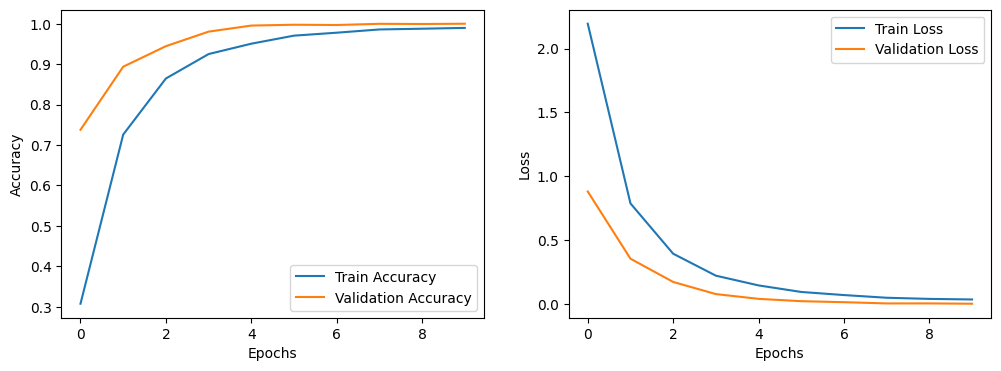

In [16]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


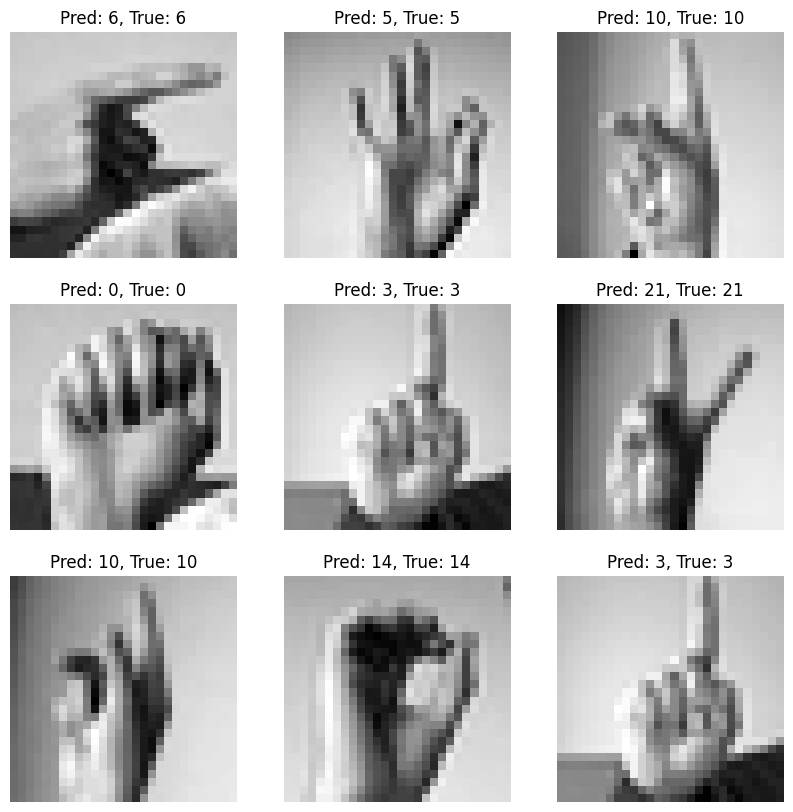

In [17]:
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {y_test_pred[i]}, True: {y_test[i]}")
    plt.axis('off')
plt.show()
